# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [10]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [2]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [7]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

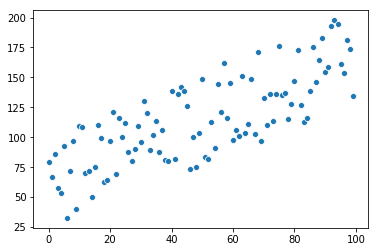

In [8]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1089.761550
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 837.833838
[1.91338738 1.80806244]
Iteration 2 | Cost: 808.120494
[1.91811082 1.90198363]
Iteration 3 | Cost: 804.573439
[1.9219035  1.93418001]
Iteration 4 | Cost: 804.107532
[1.92537668 1.94519548]
Iteration 5 | Cost: 804.004442
[1.92874011 1.94894271]
Iteration 6 | Cost: 803.944080
[1.93206577 1.95019583]
Iteration 7 | Cost: 803.888755
[1.93537836 1.95059311]
Iteration 8 | Cost: 803.834027
[1.93868635 1.9506967 ]
Iteration 9 | Cost: 803.779375
[1.94199266 1.95069951]
Iteration 10 | Cost: 803.724736
[1.94529827 1.95066774]
Iteration 11 | Cost: 803.670104
[1.94860354 1.95062411]
Iteration 12 | Cost: 803.615478
[1.95190858 1.95057641]
Iteration 13 | Cost: 803.560857
[1.95521343 1.95052731]
Iteration 14 | Cost: 803.506241
[1.95851811 1.95047774]
Iteration 15 | Cost: 803.451632
[1.96182262 1.95042801]
Iteration 16 | Cost: 803.397027
[1.96512696 1.95037822]
Iteration 17 | Cost: 803.342429
[1.96843113 1.95032841]
I

[4.18008054 1.91698439]
Iteration 699 | Cost: 767.367343
[4.18327232 1.91693627]
Iteration 700 | Cost: 767.316400
[4.18646394 1.91688815]
Iteration 701 | Cost: 767.265463
[4.18965539 1.91684004]
Iteration 702 | Cost: 767.214531
[4.19284668 1.91679192]
Iteration 703 | Cost: 767.163604
[4.19603781 1.91674381]
Iteration 704 | Cost: 767.112682
[4.19922878 1.9166957 ]
Iteration 705 | Cost: 767.061766
[4.20241959 1.9166476 ]
Iteration 706 | Cost: 767.010855
[4.20561024 1.91659949]
Iteration 707 | Cost: 766.959948
[4.20880072 1.91655139]
Iteration 708 | Cost: 766.909047
[4.21199104 1.91650329]
Iteration 709 | Cost: 766.858152
[4.2151812 1.9164552]
Iteration 710 | Cost: 766.807261
[4.2183712 1.9164071]
Iteration 711 | Cost: 766.756375
[4.22156103 1.91635901]
Iteration 712 | Cost: 766.705495
[4.2247507  1.91631092]
Iteration 713 | Cost: 766.654620
[4.22794022 1.91626284]
Iteration 714 | Cost: 766.603750
[4.23112957 1.91621475]
Iteration 715 | Cost: 766.552885
[4.23431875 1.91616667]
Iteration 7

[6.50748202 1.88189523]
Iteration 1442 | Cost: 730.907159
[6.5105557  1.88184889]
Iteration 1443 | Cost: 730.859916
[6.51362923 1.88180255]
Iteration 1444 | Cost: 730.812679
[6.5167026  1.88175621]
Iteration 1445 | Cost: 730.765446
[6.51977581 1.88170988]
Iteration 1446 | Cost: 730.718218
[6.52284887 1.88166355]
Iteration 1447 | Cost: 730.670995
[6.52592177 1.88161722]
Iteration 1448 | Cost: 730.623777
[6.52899451 1.88157089]
Iteration 1449 | Cost: 730.576563
[6.5320671  1.88152457]
Iteration 1450 | Cost: 730.529354
[6.53513954 1.88147825]
Iteration 1451 | Cost: 730.482150
[6.53821181 1.88143193]
Iteration 1452 | Cost: 730.434951
[6.54128394 1.88138561]
Iteration 1453 | Cost: 730.387757
[6.5443559 1.8813393]
Iteration 1454 | Cost: 730.340567
[6.54742771 1.88129299]
Iteration 1455 | Cost: 730.293382
[6.55049936 1.88124668]
Iteration 1456 | Cost: 730.246202
[6.55357086 1.88120037]
Iteration 1457 | Cost: 730.199027
[6.55664221 1.88115406]
Iteration 1458 | Cost: 730.151857
[6.55971339 1.88

Iteration 2191 | Cost: 696.832354
[8.76948489 1.84779205]
Iteration 2192 | Cost: 696.788569
[8.77244379 1.84774744]
Iteration 2193 | Cost: 696.744789
[8.77540254 1.84770283]
Iteration 2194 | Cost: 696.701014
[8.77836114 1.84765822]
Iteration 2195 | Cost: 696.657243
[8.78131959 1.84761362]
Iteration 2196 | Cost: 696.613476
[8.78427789 1.84756902]
Iteration 2197 | Cost: 696.569714
[8.78723605 1.84752442]
Iteration 2198 | Cost: 696.525957
[8.79019405 1.84747983]
Iteration 2199 | Cost: 696.482203
[8.7931519  1.84743523]
Iteration 2200 | Cost: 696.438455
[8.7961096  1.84739064]
Iteration 2201 | Cost: 696.394710
[8.79906715 1.84734605]
Iteration 2202 | Cost: 696.350970
[8.80202455 1.84730146]
Iteration 2203 | Cost: 696.307235
[8.8049818  1.84725688]
Iteration 2204 | Cost: 696.263504
[8.8079389  1.84721229]
Iteration 2205 | Cost: 696.219777
[8.81089585 1.84716771]
Iteration 2206 | Cost: 696.176055
[8.81385265 1.84712314]
Iteration 2207 | Cost: 696.132337
[8.8168093  1.84707856]
Iteration 2208

Iteration 2918 | Cost: 666.145499
[10.88146548  1.81595068]
Iteration 2919 | Cost: 666.104829
[10.88431722  1.81590769]
Iteration 2920 | Cost: 666.064163
[10.88716881  1.8158647 ]
Iteration 2921 | Cost: 666.023501
[10.89002025  1.81582171]
Iteration 2922 | Cost: 665.982843
[10.89287156  1.81577872]
Iteration 2923 | Cost: 665.942189
[10.89572271  1.81573573]
Iteration 2924 | Cost: 665.901540
[10.89857372  1.81569275]
Iteration 2925 | Cost: 665.860894
[10.90142459  1.81564977]
Iteration 2926 | Cost: 665.820253
[10.90427531  1.81560679]
Iteration 2927 | Cost: 665.779616
[10.90712589  1.81556381]
Iteration 2928 | Cost: 665.738983
[10.90997632  1.81552084]
Iteration 2929 | Cost: 665.698354
[10.91282661  1.81547787]
Iteration 2930 | Cost: 665.657729
[10.91567676  1.8154349 ]
Iteration 2931 | Cost: 665.617109
[10.91852675  1.81539193]
Iteration 2932 | Cost: 665.576492
[10.92137661  1.81534896]
Iteration 2933 | Cost: 665.535880
[10.92422632  1.815306  ]
Iteration 2934 | Cost: 665.495271
[10.92

Iteration 3529 | Cost: 642.049558
[12.59718509  1.79008357]
Iteration 3530 | Cost: 642.011333
[12.59994977  1.79004188]
Iteration 3531 | Cost: 641.973112
[12.60271431  1.7900002 ]
Iteration 3532 | Cost: 641.934895
[12.6054787   1.78995853]
Iteration 3533 | Cost: 641.896681
[12.60824296  1.78991685]
Iteration 3534 | Cost: 641.858472
[12.61100707  1.78987518]
Iteration 3535 | Cost: 641.820267
[12.61377104  1.78983351]
Iteration 3536 | Cost: 641.782065
[12.61653488  1.78979184]
Iteration 3537 | Cost: 641.743867
[12.61929857  1.78975017]
Iteration 3538 | Cost: 641.705673
[12.62206213  1.78970851]
Iteration 3539 | Cost: 641.667483
[12.62482554  1.78966684]
Iteration 3540 | Cost: 641.629297
[12.62758881  1.78962518]
Iteration 3541 | Cost: 641.591115
[12.63035195  1.78958352]
Iteration 3542 | Cost: 641.552937
[12.63311494  1.78954187]
Iteration 3543 | Cost: 641.514762
[12.63587779  1.78950021]
Iteration 3544 | Cost: 641.476592
[12.6386405   1.78945856]
Iteration 3545 | Cost: 641.438425
[12.64

[14.39437344  1.76298818]
Iteration 4191 | Cost: 617.574773
[14.39704692  1.76294787]
Iteration 4192 | Cost: 617.539032
[14.39972027  1.76290757]
Iteration 4193 | Cost: 617.503295
[14.40239348  1.76286727]
Iteration 4194 | Cost: 617.467561
[14.40506656  1.76282696]
Iteration 4195 | Cost: 617.431831
[14.4077395   1.76278667]
Iteration 4196 | Cost: 617.396104
[14.4104123   1.76274637]
Iteration 4197 | Cost: 617.360381
[14.41308497  1.76270607]
Iteration 4198 | Cost: 617.324662
[14.4157575   1.76266578]
Iteration 4199 | Cost: 617.288946
[14.4184299   1.76262549]
Iteration 4200 | Cost: 617.253234
[14.42110216  1.7625852 ]
Iteration 4201 | Cost: 617.217525
[14.42377429  1.76254492]
Iteration 4202 | Cost: 617.181820
[14.42644628  1.76250463]
Iteration 4203 | Cost: 617.146119
[14.42911813  1.76246435]
Iteration 4204 | Cost: 617.110422
[14.43178985  1.76242407]
Iteration 4205 | Cost: 617.074728
[14.43446144  1.76238379]
Iteration 4206 | Cost: 617.039037
[14.43713288  1.76234352]
Iteration 4207

Iteration 4690 | Cost: 600.183136
[15.71433287  1.74308776]
Iteration 4691 | Cost: 600.149160
[15.71693938  1.74304846]
Iteration 4692 | Cost: 600.115187
[15.71954575  1.74300916]
Iteration 4693 | Cost: 600.081218
[15.72215199  1.74296987]
Iteration 4694 | Cost: 600.047252
[15.7247581   1.74293058]
Iteration 4695 | Cost: 600.013290
[15.72736407  1.74289129]
Iteration 4696 | Cost: 599.979331
[15.72996992  1.742852  ]
Iteration 4697 | Cost: 599.945375
[15.73257563  1.74281272]
Iteration 4698 | Cost: 599.911423
[15.73518121  1.74277344]
Iteration 4699 | Cost: 599.877475
[15.73778666  1.74273415]
Iteration 4700 | Cost: 599.843529
[15.74039197  1.74269488]
Iteration 4701 | Cost: 599.809588
[15.74299715  1.7426556 ]
Iteration 4702 | Cost: 599.775649
[15.7456022   1.74261632]
Iteration 4703 | Cost: 599.741715
[15.74820712  1.74257705]
Iteration 4704 | Cost: 599.707783
[15.75081191  1.74253778]
Iteration 4705 | Cost: 599.673855
[15.75341656  1.74249851]
Iteration 4706 | Cost: 599.639931
[15.75

Iteration 5440 | Cost: 575.645393
[17.63252844  1.714168  ]
Iteration 5441 | Cost: 575.613907
[17.63503761  1.71413017]
Iteration 5442 | Cost: 575.582425
[17.63754666  1.71409234]
Iteration 5443 | Cost: 575.550945
[17.64005557  1.71405452]
Iteration 5444 | Cost: 575.519468
[17.64256436  1.71401669]
Iteration 5445 | Cost: 575.487995
[17.64507303  1.71397887]
Iteration 5446 | Cost: 575.456525
[17.64758156  1.71394105]
Iteration 5447 | Cost: 575.425058
[17.65008997  1.71390323]
Iteration 5448 | Cost: 575.393594
[17.65259825  1.71386542]
Iteration 5449 | Cost: 575.362134
[17.6551064  1.7138276]
Iteration 5450 | Cost: 575.330677
[17.65761443  1.71378979]
Iteration 5451 | Cost: 575.299223
[17.66012232  1.71375198]
Iteration 5452 | Cost: 575.267772
[17.66263009  1.71371417]
Iteration 5453 | Cost: 575.236324
[17.66513774  1.71367637]
Iteration 5454 | Cost: 575.204879
[17.66764526  1.71363856]
Iteration 5455 | Cost: 575.173438
[17.67015264  1.71360076]
Iteration 5456 | Cost: 575.142000
[17.6726

Iteration 6158 | Cost: 553.841312
[19.40173383  1.6874945 ]
Iteration 6159 | Cost: 553.812039
[19.40415323  1.68745803]
Iteration 6160 | Cost: 553.782769
[19.4065725   1.68742155]
Iteration 6161 | Cost: 553.753501
[19.40899166  1.68738508]
Iteration 6162 | Cost: 553.724237
[19.41141069  1.68734861]
Iteration 6163 | Cost: 553.694975
[19.41382959  1.68731214]
Iteration 6164 | Cost: 553.665717
[19.41624838  1.68727567]
Iteration 6165 | Cost: 553.636461
[19.41866704  1.68723921]
Iteration 6166 | Cost: 553.607209
[19.42108558  1.68720274]
Iteration 6167 | Cost: 553.577959
[19.42350399  1.68716628]
Iteration 6168 | Cost: 553.548713
[19.42592229  1.68712982]
Iteration 6169 | Cost: 553.519469
[19.42834046  1.68709337]
Iteration 6170 | Cost: 553.490228
[19.4307585   1.68705691]
Iteration 6171 | Cost: 553.460991
[19.43317643  1.68702046]
Iteration 6172 | Cost: 553.431756
[19.43559423  1.686984  ]
Iteration 6173 | Cost: 553.402524
[19.43801191  1.68694755]
Iteration 6174 | Cost: 553.373295
[19.44

Iteration 6802 | Cost: 535.591215
[20.93468158  1.66438295]
Iteration 6803 | Cost: 535.563794
[20.9370232   1.66434765]
Iteration 6804 | Cost: 535.536376
[20.93936469  1.66431235]
Iteration 6805 | Cost: 535.508960
[20.94170607  1.66427705]
Iteration 6806 | Cost: 535.481547
[20.94404732  1.66424175]
Iteration 6807 | Cost: 535.454137
[20.94638846  1.66420645]
Iteration 6808 | Cost: 535.426729
[20.94872948  1.66417116]
Iteration 6809 | Cost: 535.399325
[20.95107038  1.66413586]
Iteration 6810 | Cost: 535.371923
[20.95341116  1.66410057]
Iteration 6811 | Cost: 535.344524
[20.95575182  1.66406528]
Iteration 6812 | Cost: 535.317128
[20.95809236  1.66403   ]
Iteration 6813 | Cost: 535.289734
[20.96043279  1.66399471]
Iteration 6814 | Cost: 535.262344
[20.96277309  1.66395943]
Iteration 6815 | Cost: 535.234956
[20.96511328  1.66392415]
Iteration 6816 | Cost: 535.207571
[20.96745335  1.66388887]
Iteration 6817 | Cost: 535.180188
[20.9697933   1.66385359]
Iteration 6818 | Cost: 535.152809
[20.97

Iteration 7487 | Cost: 517.444751
[22.51116929  1.64061497]
Iteration 7488 | Cost: 517.419171
[22.51343091  1.64058087]
Iteration 7489 | Cost: 517.393594
[22.51569242  1.64054677]
Iteration 7490 | Cost: 517.368019
[22.5179538   1.64051268]
Iteration 7491 | Cost: 517.342448
[22.52021508  1.64047859]
Iteration 7492 | Cost: 517.316878
[22.52247624  1.6404445 ]
Iteration 7493 | Cost: 517.291311
[22.52473728  1.64041041]
Iteration 7494 | Cost: 517.265747
[22.52699821  1.64037632]
Iteration 7495 | Cost: 517.240186
[22.52925903  1.64034224]
Iteration 7496 | Cost: 517.214627
[22.53151973  1.64030815]
Iteration 7497 | Cost: 517.189070
[22.53378031  1.64027407]
Iteration 7498 | Cost: 517.163516
[22.53604078  1.64023999]
Iteration 7499 | Cost: 517.137965
[22.53830114  1.64020591]
Iteration 7500 | Cost: 517.112417
[22.54056138  1.64017184]
Iteration 7501 | Cost: 517.086871
[22.54282151  1.64013776]
Iteration 7502 | Cost: 517.061327
[22.54508152  1.64010369]
Iteration 7503 | Cost: 517.035786
[22.54

[23.97040623  1.61861472]
Iteration 8144 | Cost: 501.186070
[23.9725938   1.61858174]
Iteration 8145 | Cost: 501.162140
[23.97478126  1.61854876]
Iteration 8146 | Cost: 501.138213
[23.97696861  1.61851578]
Iteration 8147 | Cost: 501.114288
[23.97915585  1.61848281]
Iteration 8148 | Cost: 501.090365
[23.98134298  1.61844983]
Iteration 8149 | Cost: 501.066445
[23.98353     1.61841686]
Iteration 8150 | Cost: 501.042527
[23.98571691  1.61838389]
Iteration 8151 | Cost: 501.018612
[23.9879037   1.61835092]
Iteration 8152 | Cost: 500.994699
[23.99009039  1.61831795]
Iteration 8153 | Cost: 500.970789
[23.99227696  1.61828499]
Iteration 8154 | Cost: 500.946881
[23.99446343  1.61825202]
Iteration 8155 | Cost: 500.922976
[23.99664978  1.61821906]
Iteration 8156 | Cost: 500.899073
[23.99883602  1.6181861 ]
Iteration 8157 | Cost: 500.875172
[24.00102215  1.61815314]
Iteration 8158 | Cost: 500.851274
[24.00320817  1.61812018]
Iteration 8159 | Cost: 500.827378
[24.00539408  1.61808723]
Iteration 8160

Iteration 8780 | Cost: 486.446753
[25.34164452  1.59794119]
Iteration 8781 | Cost: 486.424319
[25.34376251  1.59790926]
Iteration 8782 | Cost: 486.401888
[25.3458804   1.59787733]
Iteration 8783 | Cost: 486.379458
[25.34799818  1.5978454 ]
Iteration 8784 | Cost: 486.357031
[25.35011585  1.59781347]
Iteration 8785 | Cost: 486.334606
[25.35223341  1.59778155]
Iteration 8786 | Cost: 486.312183
[25.35435087  1.59774962]
Iteration 8787 | Cost: 486.289763
[25.35646821  1.5977177 ]
Iteration 8788 | Cost: 486.267345
[25.35858546  1.59768578]
Iteration 8789 | Cost: 486.244929
[25.36070259  1.59765386]
Iteration 8790 | Cost: 486.222516
[25.36281962  1.59762194]
Iteration 8791 | Cost: 486.200104
[25.36493653  1.59759003]
Iteration 8792 | Cost: 486.177695
[25.36705335  1.59755811]
Iteration 8793 | Cost: 486.155289
[25.36917005  1.5975262 ]
Iteration 8794 | Cost: 486.132884
[25.37128665  1.59749429]
Iteration 8795 | Cost: 486.110482
[25.37340314  1.59746238]
Iteration 8796 | Cost: 486.088082
[25.37

[26.71230942  1.5772763 ]
Iteration 9439 | Cost: 472.145554
[26.71435787  1.57724542]
Iteration 9440 | Cost: 472.124571
[26.71640621  1.57721454]
Iteration 9441 | Cost: 472.103591
[26.71845444  1.57718366]
Iteration 9442 | Cost: 472.082612
[26.72050257  1.57715278]
Iteration 9443 | Cost: 472.061636
[26.7225506  1.5771219]
Iteration 9444 | Cost: 472.040662
[26.72459852  1.57709103]
Iteration 9445 | Cost: 472.019690
[26.72664634  1.57706015]
Iteration 9446 | Cost: 471.998720
[26.72869406  1.57702928]
Iteration 9447 | Cost: 471.977752
[26.73074167  1.57699841]
Iteration 9448 | Cost: 471.956787
[26.73278918  1.57696754]
Iteration 9449 | Cost: 471.935823
[26.73483658  1.57693667]
Iteration 9450 | Cost: 471.914862
[26.73688388  1.57690581]
Iteration 9451 | Cost: 471.893902
[26.73893107  1.57687494]
Iteration 9452 | Cost: 471.872945
[26.74097817  1.57684408]
Iteration 9453 | Cost: 471.851990
[26.74302515  1.57681322]
Iteration 9454 | Cost: 471.831037
[26.74507204  1.57678236]
Iteration 9455 |

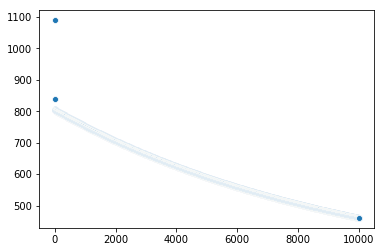

In [13]:
numEpochs= 10000
alpha = 0.0002
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise